<h1><center>Data Science Project</center></h1>
<h2><center>Part 2</center></h2>

## Question 1:

In [1]:
def bases(num):
    curr = num
    binary = ""
    while(curr>0):
        temp = curr%2
        binary = str(temp) + binary
        curr=curr//2
        
    curr = num
    octal = ""
    while(curr>0):
        temp = curr%8
        if(temp<9):
            octal = str(temp) + octal
        curr=curr//8
        
    curr = num
    hexa = ""
    dict = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F'}
    while(curr>0):
        temp = curr%16
        if(temp<9):
            hexa = str(temp) + hexa
        if(temp>9 and temp<16):
            hexa = dict[temp] + hexa
        curr = curr//16
        
    return "Binary: " + binary, "Octal: " + octal, "Hex: " + hexa

In [2]:
bases(10)

('Binary: 1010', 'Octal: 12', 'Hex: A')

#### Using Python Functions:

In [3]:
def bases2(n):
    return "Binary: " + bin(n), "Octal: " + oct(n), "Hex: " + hex(n)

In [4]:
bases2(10)

('Binary: 0b1010', 'Octal: 0o12', 'Hex: 0xa')

<h2><center>Cast Dataset</center></h2>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


> ## Question 1
> How many movies have the title "Hamlet"?

In [7]:
cast.title[cast.title=='Hamlet'].count()

299

In [8]:
cast.loc[cast['title']=='Hamlet']

,title,year,name,type,character,n
1456,Hamlet,1996,Riz Abbasi,actor,Attendant to Claudius,1.0
6710,Hamlet,1921,Fritz Achterberg,actor,"Fortinbras,",9.0
10274,Hamlet,2009,Hayden Adams,actor,Laertes,7.0
10275,Hamlet,2009,Hayden Adams,actor,Player,7.0
12743,Hamlet,1913,Eric Adeney,actor,Reynaldo,14.0
...,...,...,...,...,...,...
3212647,Hamlet,1964,Carol Teitel,actress,Lady,NaN
3236803,Hamlet,1969,Jennifer Tudor,actress,Court lady,23.0
3257437,Hamlet,2000,Diane Venora,actress,Gertrude,3.0
3284728,Hamlet,1996,Perdita Weeks,actress,Second Player,44.0


In [9]:
cast[cast["title"]=="Hamlet"]["year"].drop_duplicates().count()

17

> ## Question 2
> List all the "Treasure Island" movies from earliest to most recent.

In [10]:
cast.loc[cast['title']=='Treasure Island'].drop_duplicates(subset = 'year').sort_values(by = 'year')

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


> ## Question 3
> How many roles were credited in the silent 1921 version of Hamlet?

In [11]:
cast[(cast['year']==1921) & (cast['title']=='Hamlet')]

,title,year,name,type,character,n
6710,Hamlet,1921,Fritz Achterberg,actor,"Fortinbras,",9.0
408456,Hamlet,1921,Paul Conradi,actor,K?nig Hamlet,2.0
495468,Hamlet,1921,Anton De Verdier,actor,Laertes,7.0
1015046,Hamlet,1921,Hans Junkermann,actor,Polonius,6.0
1948795,Hamlet,1921,Heinz Stieda,actor,Horatio,5.0
2116906,Hamlet,1921,Eduard von Winterstein,actor,Claudius,4.0
2370048,Hamlet,1921,Mathilde Brandt,actress,K?nigin Gertrude,3.0
2713980,Hamlet,1921,Lilly Jacobson,actress,Ophelia,8.0
2964897,Hamlet,1921,Asta Nielsen,actress,Hamlet,1.0


> ## Question 4
> Use groupby() to plot the number of "Hamlet" films made each decade.

In [12]:
cast_years = cast.groupby(by="title")

In [13]:
cast_years_hamlet = cast_years.get_group("Hamlet")

In [14]:
cast_years_hamlet["year"].value_counts().sort_index()

1910     1
1911     6
1913    21
1921     9
1948    25
1954     1
1964    33
1969    24
1973     8
1976    11
1987     3
1990    29
1996    55
2000    38
2009    17
2011    12
2015     6
Name: year, dtype: int64

In [15]:
hamlet_years_1910 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1910) & (cast_years_hamlet["year"]<=1919)])
hamlet_years_1920 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1920) & (cast_years_hamlet["year"]<=1929)])
hamlet_years_1930 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1930) & (cast_years_hamlet["year"]<=1939)])
hamlet_years_1940 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1940) & (cast_years_hamlet["year"]<=1949)])
hamlet_years_1950 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1950) & (cast_years_hamlet["year"]<=1959)])
hamlet_years_1960 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1960) & (cast_years_hamlet["year"]<=1969)])
hamlet_years_1970 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1970) & (cast_years_hamlet["year"]<=1979)])
hamlet_years_1980 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1980) & (cast_years_hamlet["year"]<=1989)])
hamlet_years_1990 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1990) & (cast_years_hamlet["year"]<=1999)])
hamlet_years_2000 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=2000) & (cast_years_hamlet["year"]<=2009)])
hamlet_years_2010 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=2010) & (cast_years_hamlet["year"]<=2019)])

In [16]:
decades = {1910: hamlet_years_1910,
           1920: hamlet_years_1920,
           1930: hamlet_years_1930,
           1940: hamlet_years_1940,
           1950: hamlet_years_1950,
           1960: hamlet_years_1960,
           1970: hamlet_years_1970,
           1980: hamlet_years_1980,
           1990: hamlet_years_1990,
           2000: hamlet_years_2000,
           2010: hamlet_years_2010}

In [17]:
decades_ser = pd.Series(decades)
decades_ser

1910    28
1920     9
1930     0
1940    25
1950     1
1960    57
1970    19
1980     3
1990    84
2000    55
2010    18
dtype: int64

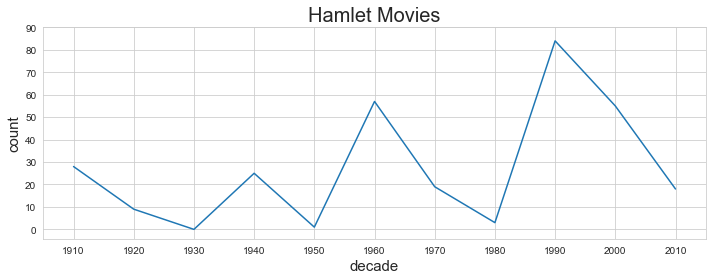

In [25]:
plt.figure(figsize=(10,4))
sns.set_style(style="whitegrid")
decades_ser.plot()
plt.xticks(decades_ser.index)
plt.xticks(decades_ser.index)
plt.yticks(np.arange(0,100,step=10))
plt.xlabel("decade", size=15)
plt.ylabel("count", size=15)
plt.title("Hamlet Movies", size=20)
plt.tight_layout()
plt.show()

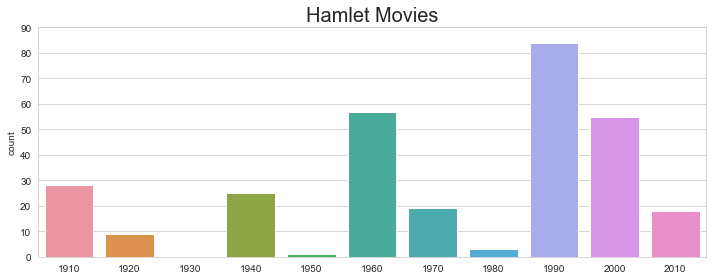

In [26]:
plt.figure(figsize=(10,4))
decades_df = pd.DataFrame(decades_ser, columns=["count"])
sns.barplot(y=decades_df["count"], x=decades_df.index)
plt.yticks(np.arange(0,100,step=10))
plt.title("Hamlet Movies", size=20)
plt.tight_layout()
plt.show()

> ## Question 5
> How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950's?

In [20]:
cast.n[(cast['year']==1950) & (cast['n']==1)].count()

875

> ## Question 6
> List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [21]:
cast[(cast["n"]==1)]["name"].value_counts().head(10)

Charles Starrett     200
Mohanlal             184
Mammootty            177
Buck Jones           130
Rajesh Khanna        127
Johnny Mack Brown    124
John Wayne           117
Amitabh Bachchan     113
Bob Steele           110
Dharmendra           107
Name: name, dtype: int64

> ## Question 7
> List, in order by years, each of the films in which Frank Oz has played more than 1 role.

In [22]:
frank_oz = cast[cast["name"]=="Frank Oz"].copy()
frank_oz.sort_values(by=["year"], inplace=True)

In [23]:
# false marks all duplicates as true
frank_oz_dup = frank_oz[frank_oz.duplicated("title", keep=False)].copy()
frank_oz_dup.drop_duplicates("title", inplace=True)

In [24]:
frank_oz_dup.set_index("year").drop(columns=["type", "character", "n"])

,title,name
year,,
1979,The Muppet Movie,Frank Oz
1981,The Great Muppet Caper,Frank Oz
1981,An American Werewolf in London,Frank Oz
1982,The Dark Crystal,Frank Oz
1984,The Muppets Take Manhattan,Frank Oz
1985,Sesame Street Presents: Follow that Bird,Frank Oz
1992,The Muppet Christmas Carol,Frank Oz
1996,Muppet Treasure Island,Frank Oz
1999,The Adventures of Elmo in Grouchland,Frank Oz
